<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202302/blob/main/Lecture04/Notebook_SS04_Ridge.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# Regularization

## Ridge 

To apply a regularized model we can use the `glmnet` function of the homonymous package. The function contains an `alpha` parameter that tells `glmnet` to perform a ridge (`alpha` = 0), lasso (`alpha` = 1), or elastic net (0 < `alpha` < 1) model. 

By default, `glmnet` will do two things that you should know:

1. Since regularized methods apply a penalty to the coefficients, we need to ensure our coefficients are on a common scale. If not, then predictors with naturally larger values  will be penalized more than predictors with naturally smaller values. By default, `glmnet` automatically standardizes your features. If you standardize your predictors prior to glmnet you can turn this argument off with `standardize = FALSE`.

2. The regularization path is computed at a grid of values (on the log scale) for the regularization parameter $\lambda$. The algorithm is extremely fast!

In [ ]:
#install.packages("pacman") for #google colab

In [1]:
require("pacman")
p_load("tidyverse","glmnet")


Loading required package: pacman



In [2]:
dta <-read.csv("regularization_train.csv")

In [3]:
head(dta)

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.1980395,0.7552796,0.6363897,0.2988658,1.07502488,-1.43701703,1.17718391,0.015044129,-0.249062061,0.3368126,⋯,-0.03474689,0.27971538,0.3452132,0.2460198246,0.19558655,-0.3707355,0.13914804,0.09187041,-0.37783470,0.37972363
2,18.1440224,1.6906771,1.5948580,-0.5457104,0.24043352,-0.41724719,0.41262863,-0.465758116,0.403439557,-0.4305906,⋯,0.32525102,-0.01143376,0.2278303,-0.2909429513,-0.08929398,0.2871926,0.04536198,0.45435608,0.38229946,-0.32605098
3,-1.8220847,-0.7645479,-0.6428954,2.1718472,-0.05173626,0.69415987,0.06039525,-0.427916557,-0.003018682,-0.4978433,⋯,0.23100465,0.03219767,-0.1214889,0.1940821623,-0.07785547,-0.1778594,0.25197322,0.34065343,-0.47145042,0.21492027
4,7.6544020,-0.2210150,0.1078991,1.0185493,-2.17168646,2.78553722,-2.42182493,-0.009163947,-0.120403130,0.2775865,⋯,0.32966052,0.35275769,-0.1574833,-0.0008299758,0.08471984,0.1295344,0.38212470,-0.49559730,0.03485766,0.04703017
5,-4.0691178,0.4859793,0.8671857,2.7773416,0.82746791,0.20848131,0.71845705,0.421310296,0.046955276,0.4089429,⋯,0.14235210,0.09370193,0.4979891,0.3236736609,0.29409226,-0.3089501,-0.02544815,-0.21449766,0.44993749,-0.33999029
6,0.6105467,-1.2249981,-1.1458775,0.3513834,0.61855930,0.01185944,0.58706927,0.026737701,0.259090371,0.3755685,⋯,0.11441915,0.19426631,0.4370024,-0.0295350854,0.27434505,-0.1933952,0.04469562,0.23873868,0.34416821,-0.24759588


`glmnet` has some drawbacks, the main one is that we need to specify the arguments in terms of matrices and vector. `caret`, in contrast, streamlines the process of creating predictive models by providing a uniform interface for predictive models, which, among other things, allows for specifying formulas.

In [4]:
Xsmall<-as.matrix(dta[,2:7])

In [5]:
y<-dta[,1]

In [6]:
ridge1 <- glmnet(
  x = Xsmall,
  y = y,
  lambda=0.01,
  alpha = 0 #ridge
)

In [7]:
coef(ridge1)

7 x 1 sparse Matrix of class "dgCMatrix"
                   s0
(Intercept)  8.948401
X1          -3.474658
X2           6.187494
X3          -4.992242
X4          -6.673480
X5           5.602866
X6           8.184927

In [8]:
summary(lm(y~Xsmall))


Call:
lm(formula = y ~ Xsmall)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.926  -6.194   0.035   6.764  24.504 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.929      1.181   7.559 9.45e-11 ***
XsmallX1      -3.924      6.316  -0.621    0.536    
XsmallX2       6.622      6.187   1.070    0.288    
XsmallX3      -5.013      1.182  -4.242 6.42e-05 ***
XsmallX4      -7.784     10.045  -0.775    0.441    
XsmallX5       5.612      1.279   4.388 3.78e-05 ***
XsmallX6       9.274      9.901   0.937    0.352    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.24 on 73 degrees of freedom
Multiple R-squared:  0.366,	Adjusted R-squared:  0.3139 
F-statistic: 7.024 on 6 and 73 DF,  p-value: 6.331e-06


In [9]:
cor(Xsmall)

,X1,X2,X3,X4,X5,X6
X1,1.000000000,0.983552667,0.007771521,0.07928728,-0.11429823,0.09251513
X2,0.983552667,1.000000000,-0.007241474,0.08983334,-0.08596706,0.09671347
X3,0.007771521,-0.007241474,1.000000000,-0.04608190,0.08295434,-0.02246861
X4,0.079287279,0.089833340,-0.046081902,1.00000000,-0.26785783,0.99071955
X5,-0.114298226,-0.085967058,0.082954339,-0.26785783,1.00000000,-0.28414633
X6,0.092515129,0.096713471,-0.022468612,0.99071955,-0.28414633,1.00000000


Let's see the regularization path, that shows how much the coefficients are penalized for different values of $\lambda$. 

In [10]:
ridge2 <- glmnet(
  x = Xsmall,
  y = y,
  alpha = 0 #ridge
)

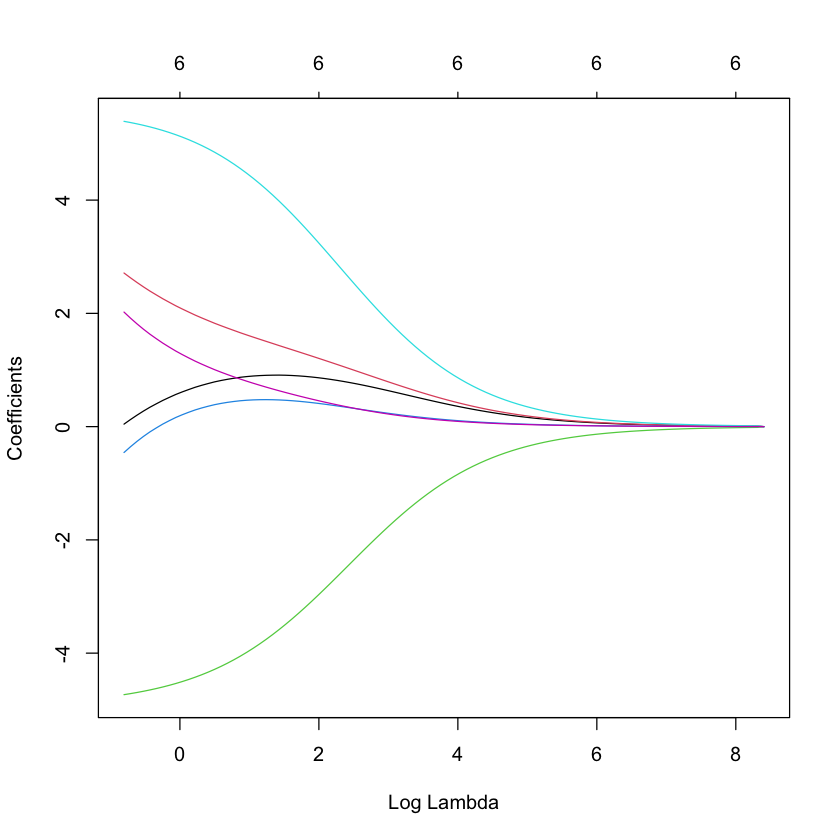

In [11]:
plot(ridge2, xvar = "lambda")

In [12]:
lasso1 <- glmnet(
  x = Xsmall,
  y = y,
lambda=0.01,
  alpha = 1 #lasso
)


In [13]:
coef(lasso1)

7 x 1 sparse Matrix of class "dgCMatrix"
                   s0
(Intercept)  8.962928
X1          -3.018713
X2           5.745889
X3          -4.976683
X4          -5.893608
X5           5.599759
X6           7.421563

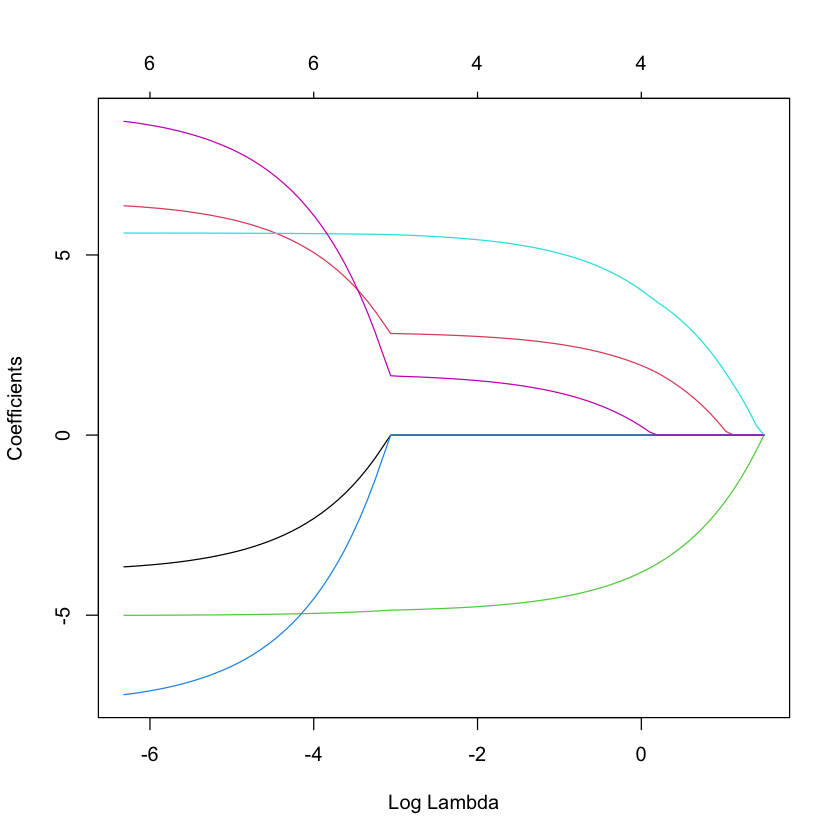

In [14]:
lasso2 <- glmnet(
  x = Xsmall,
  y = y,
  alpha = 1 #lasso
)

plot(lasso2, xvar = "lambda")

In [15]:
data.frame(cbind(lambda=log(lasso2$lambda),t(as.matrix(lasso2$beta))))  %>% arrange(lambda)

,lambda,X1,X2,X3,X4,X5,X6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s84,-6.316874,-3.657918,6.365579,-5.003328,-7.206203,5.608808,8.709461
s83,-6.223840,-3.645256,6.353293,-5.002780,-7.179847,5.608610,8.683584
s82,-6.130806,-3.630201,6.338699,-5.002155,-7.148991,5.608400,8.653309
s81,-6.037773,-3.612630,6.321676,-5.001450,-7.113423,5.608177,8.618427
s80,-5.944739,-3.595079,6.304654,-5.000720,-7.077696,5.607930,8.583363
s79,-5.851705,-3.575166,6.285348,-4.999905,-7.037380,5.607662,8.543805
s78,-5.758671,-3.552818,6.263686,-4.999002,-6.992320,5.607372,8.499600
s77,-5.665638,-3.527950,6.239585,-4.998005,-6.942350,5.607056,8.450585
s76,-5.572604,-3.500478,6.212962,-4.996909,-6.887313,5.606713,8.396601


# Predictive exercise with k>n

## Ridge

In [16]:
X<-as.matrix(dta[,-1])

In [17]:
cv_ridge <- cv.glmnet(
  x = X,
  y = y,
  alpha = 0 #ridge
)

In [18]:
cv_ridge


Call:  cv.glmnet(x = X, y = y, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure   SE Nonzero
min     45   100   137.5 16.6     106
1se   4075     3   154.1 21.8     106

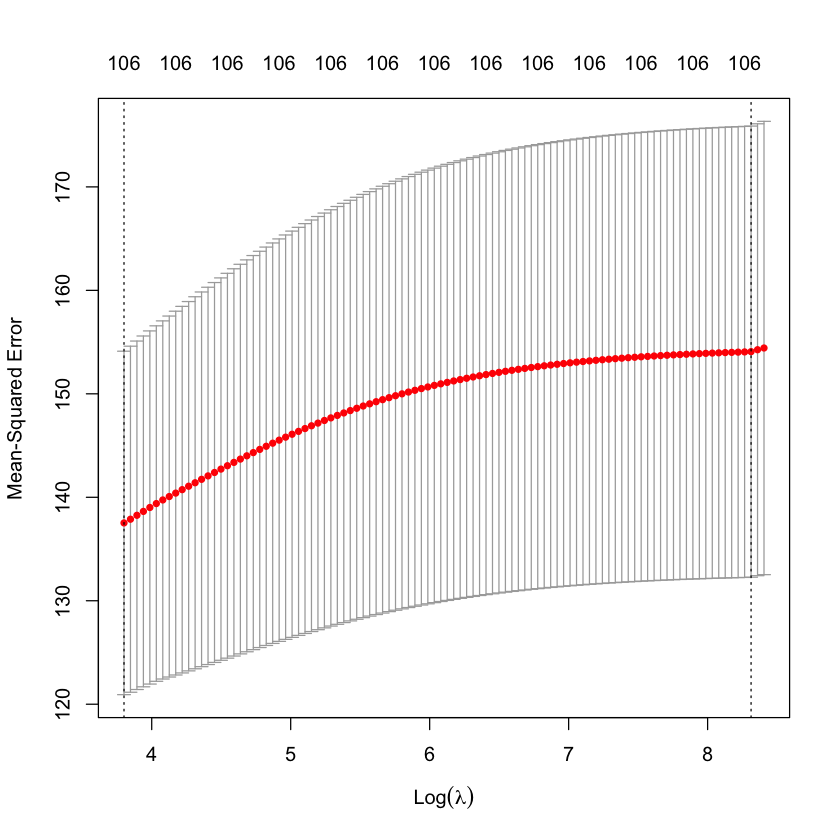

In [19]:
plot(cv_ridge)

In [20]:
cv_ridge$lambda.min

[1] 44.72558

In [21]:
coef(cv_ridge, s = "lambda.min")

107 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  7.948040486
X1           0.397434138
X2           0.450500647
X3          -0.790585955
X4           0.087297810
X5           0.776424774
X6           0.072465818
X7           0.327465820
X8          -0.816129460
X9          -0.583053433
X10          0.109287693
X11          0.577656580
X12         -1.110626513
X13         -0.188598731
X14         -1.744758154
X15          0.175879667
X16         -0.247150907
X17         -0.889624786
X18          0.496800647
X19         -1.691392094
X20         -0.845366800
X21          0.223247784
X22         -0.334622348
X23         -0.593441186
X24         -0.038183676
X25         -0.128797767
X26         -0.773188625
X27          0.763349696
X28         -1.206163714
X29         -0.467284783
X30         -1.191163183
X31          1.303094688
X32          1.420842674
X33         -0.105246996
X34          1.171847126
X35          0.532555380
X36         -0.350607604
X37    

## Lasso

In [22]:
cv_lasso <- cv.glmnet(
  x = X,
  y = y,
  alpha = 1 #lasso
)

In [23]:
coef(cv_lasso, s = "lambda.min")

107 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept)  8.8524583
X1           .        
X2           1.4601616
X3          -3.4148902
X4           .        
X5           2.9975878
X6           .        
X7           .        
X8           .        
X9           .        
X10          .        
X11          .        
X12         -0.4019582
X13          .        
X14         -0.8617901
X15          .        
X16          .        
X17          .        
X18          .        
X19         -2.3415814
X20          .        
X21          .        
X22          .        
X23          .        
X24          .        
X25          .        
X26         -1.0606936
X27          .        
X28          .        
X29          .        
X30         -0.7426494
X31          0.1702488
X32          2.8142747
X33          .        
X34          .        
X35          .        
X36          .        
X37          .        
X38          3.6707055
X39          .        
X40          .

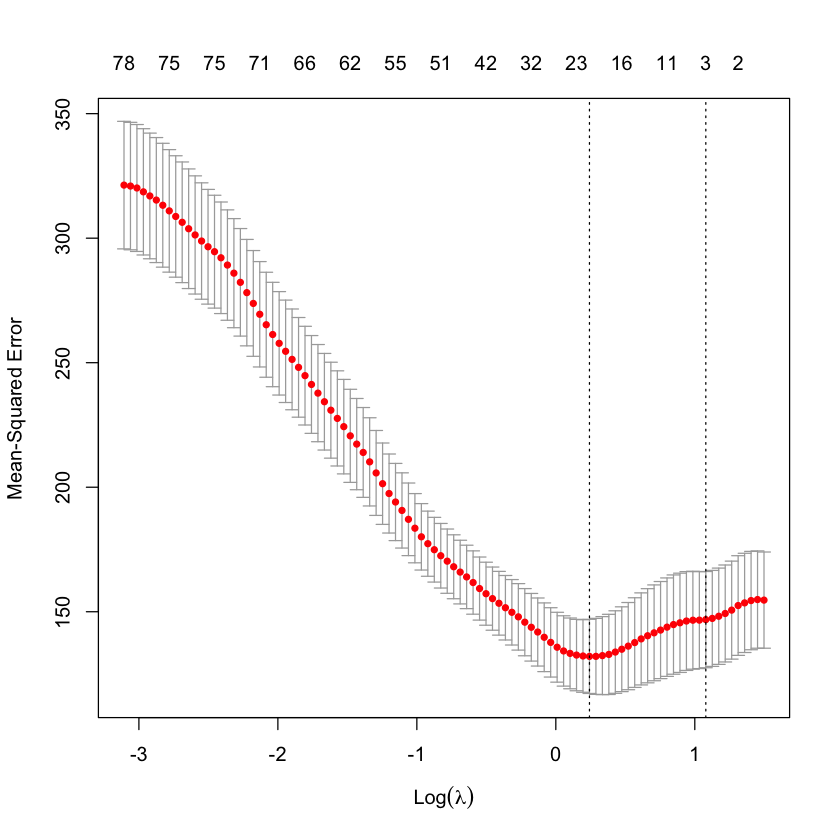

In [24]:
plot(cv_lasso)

## Elastic Net

In [25]:
cv_en <- cv.glmnet(
  x = X,
  y = y,
  alpha = 0.5
)

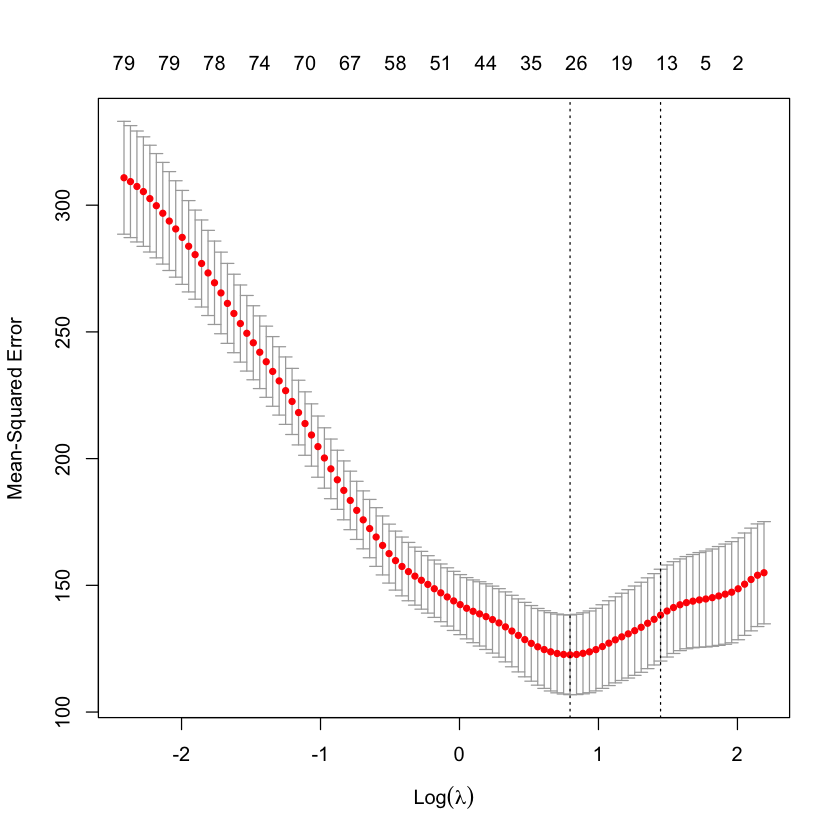

In [26]:
plot(cv_en)

## Out of sample performance

In [27]:
dta_test<-read_csv("regularization_test.csv")

Rows: 21 Columns: 107
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (107): y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
Xtest<-as.matrix(dta_test[,-1])
ytest<-dta_test$y

In [30]:
yhat_ridge<-predict(cv_ridge, newx = Xtest, s = "lambda.min")

In [31]:
MSE_ridge <- summary(lm((ytest-yhat_ridge)^2~1))$coef[1]
MSE_ridge

[1] 281.3482

In [44]:
yhat_lasso<-predict(cv_lasso, newx = Xtest, s = "lambda.min")

In [45]:
MSE_lasso<- summary(lm((ytest-yhat_lasso)^2~1))$coef[1]
MSE_lasso

[1] 244.5223

In [34]:
yhat_en<-predict(cv_en, newx = Xtest, s = "lambda.min")

In [35]:
MSE_en<- summary(lm((ytest-yhat_en)^2~1))$coef[1]
MSE_en

[1] 221.9273

In [43]:
yhat_en1se<-predict(cv_en, newx = Xtest, s = "lambda.1se")
MSE_en1se<- summary(lm((ytest-yhat_en1se)^2~1))$coef[1]
MSE_en1se

[1] 229.9461

### Caret for tunning alpha

In [37]:
p_load("caret")

In [38]:
set.seed(42)
tc_10 <- trainControl(method = "cv", number = 10)

en_caret <- train(
  x=X,
  y=y,
  method = "glmnet",
  trControl = tc_10,
  tuneLength=5
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [39]:
en_caret

glmnet 

 80 samples
106 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 72, 72, 72, 72, 72, 72, ... 
Resampling results across tuning parameters:

  alpha  lambda     RMSE      Rsquared    MAE      
  0.100  0.1927167  15.27120  0.14884891  12.767530
  0.100  0.4151955  15.26324  0.14871720  12.756396
  0.100  0.8945115  13.77556  0.16041273  11.611859
  0.100  1.9271666  12.36640  0.18106243  10.269824
  0.100  4.1519546  11.50758  0.18693872   9.307811
  0.325  0.1927167  16.51112  0.14621439  13.694341
  0.325  0.4151955  14.50505  0.14484659  12.119538
  0.325  0.8945115  12.76889  0.17431806  10.532741
  0.325  1.9271666  11.50815  0.18653110   9.237688
  0.325  4.1519546  10.93006  0.21709863   8.894330
  0.550  0.1927167  15.99911  0.12678257  13.498725
  0.550  0.4151955  13.89503  0.14670346  11.578464
  0.550  0.8945115  12.14830  0.17705778   9.866929
  0.550  1.9271666  10.87866  0.22390201   8.704425
  0.550  4.1519546  11.160

In [40]:
yhat_en_caret<-predict(en_caret, newdata = Xtest)

In [41]:
MSE_en_caret<- summary(lm((ytest-yhat_en_caret)^2~1))$coef[1]
MSE_en_caret

[1] 209.4672

In [42]:
MSE_lasso

[1] 209.788